In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
from google.colab import files
data_to_load = files.upload()

Saving ionosphere.csv to ionosphere.csv


In [3]:
data = pd.read_csv('ionosphere.csv')

In [4]:
X, y = data.values[:, :-1], data.values[:, -1]

In [5]:
X

array([[1, 0, 1.0, ..., -0.06288, -0.13738, -0.02447],
       [1, 0, 1.0, ..., -0.2418, 0.56045, -0.38238],
       [1, 0, 1.0, ..., 1.0, -0.32382, 1.0],
       ...,
       [1, 0, 0.94701, ..., 0.00442, 0.92697, -0.00577],
       [1, 0, 0.90608, ..., -0.03757, 0.87403, -0.16243],
       [1, 0, 0.8471, ..., -0.06678, 0.85764, -0.06151]], dtype=object)

In [6]:
y[y == 'b'] = 0
y[y == 'g'] = 1
y

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X.astype('float'), y.astype('int'), test_size=0.3, shuffle=True, stratify=y)

In [8]:
!pip install optuna

     |████████████████████████████████| 308 kB 23.0 MB/s 
     |████████████████████████████████| 210 kB 33.3 MB/s 
     |████████████████████████████████| 81 kB 9.5 MB/s 
     |████████████████████████████████| 78 kB 7.5 MB/s 
     |████████████████████████████████| 112 kB 36.6 MB/s 
     |████████████████████████████████| 146 kB 42.4 MB/s 
     |████████████████████████████████| 49 kB 4.7 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=d17aaf1b80bca81273d58cdb48b85f099abdc5d26325423e9bbb1014a8e82004
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [9]:
import optuna
optuna.logging.set_verbosity(optuna.logging.ERROR)

In [10]:
from sklearn.model_selection import cross_val_score

# Grid Search

In [11]:
def objective_gs(trial):
    C_vals = trial.suggest_float("C", 1e-4, 1e4)
    l1_vals = trial.suggest_float("l1_ratio", 0, 1)
    clf_obj = LogisticRegression(solver='saga', penalty='elasticnet', C=C_vals, l1_ratio=l1_vals)
    score = cross_val_score(clf_obj, X_train, y_train, scoring='accuracy', n_jobs=-1, cv=5)
    accuracy = score.mean()
    return accuracy

In [12]:
%%time
search_space = {'C': np.logspace(-4, 4, 20), 'l1_ratio': np.linspace(0, 1, 20)}
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.GridSampler(search_space))
study.optimize(objective_gs)

CPU times: user 10.5 s, sys: 451 ms, total: 10.9 s
Wall time: 45.9 s


In [13]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [14]:
print('LR, grid search, best trial:')
print(study.best_trial.params)
print('LR, grid search, best accuracy:')
print(study.best_value)
print('LR, grid search, best trial number:')
print(study.best_trial.number)

LR, grid search, best trial:
{'C': 1.623776739188721, 'l1_ratio': 0.8421052631578947}
LR, grid search, best accuracy:
0.889795918367347
LR, grid search, best trial number:
5


In [15]:
fig = optuna.visualization.plot_contour(study, params=["C", "l1_ratio"])
fig.show()

In [16]:
def evaluate_accuracy(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = (pred == y_test).mean()
    return accuracy

In [17]:
model = LogisticRegression(solver='saga', penalty='elasticnet', C=study.best_trial.params['C'], l1_ratio=study.best_trial.params['l1_ratio'])
print('LR, grid search, accuracy on test:')
print(evaluate_accuracy(model, X_train, y_train, X_test, y_test))

LR, grid search, accuracy on test:
0.8571428571428571


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [18]:
accs = []
for i in range(5):
    model = LogisticRegression(solver='saga', penalty='elasticnet', C=study.best_trial.params['C'], l1_ratio=study.best_trial.params['l1_ratio'])
    accs.append(evaluate_accuracy(model, X_train, y_train, X_test, y_test))
print('LR, grid search, average accuracy on test, 5 fits:')
print(np.mean(accs))

LR, grid search, average accuracy on test, 5 fits:
0.8571428571428571


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



# Random Search

In [19]:
def objective(trial):
    C_vals = trial.suggest_float("C", 1e-4, 1e4, log=True)
    l1_vals = trial.suggest_float("l1_ratio", 0, 1)
    clf_obj = LogisticRegression(solver='saga', penalty='elasticnet', C=C_vals, l1_ratio=l1_vals)
    score = cross_val_score(clf_obj, X_train, y_train, scoring='accuracy', n_jobs=-1, cv=5)
    accuracy = score.mean()
    return accuracy

In [20]:
%%time
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler())
study.optimize(objective, n_trials=400)

CPU times: user 7.74 s, sys: 400 ms, total: 8.14 s
Wall time: 37.1 s


In [21]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [22]:
print('LR, random search, best trial:')
print(study.best_trial.params)
print('LR, random search, best accuracy:')
print(study.best_value)
print('LR, random search, best trial number:')
print(study.best_trial.number)

LR, random search, best trial:
{'C': 0.36145833300194163, 'l1_ratio': 0.24898893630043806}
LR, random search, best accuracy:
0.8979591836734695
LR, random search, best trial number:
5


In [23]:
fig = optuna.visualization.plot_contour(study, params=["C", "l1_ratio"])
fig.show()

In [24]:
model = LogisticRegression(solver='saga', penalty='elasticnet', C=study.best_trial.params['C'], l1_ratio=study.best_trial.params['l1_ratio'])
print('LR, random search, accuracy on test:')
print(evaluate_accuracy(model, X_train, y_train, X_test, y_test))

LR, random search, accuracy on test:
0.8476190476190476


In [25]:
accs = []
for i in range(5):
    model = LogisticRegression(solver='saga', penalty='elasticnet', C=study.best_trial.params['C'], l1_ratio=study.best_trial.params['l1_ratio'])
    accs.append(evaluate_accuracy(model, X_train, y_train, X_test, y_test))
print('LR, random search, average accuracy on test, 5 fits:')
print(np.mean(accs))

LR, random search, average accuracy on test, 5 fits:
0.8476190476190476


# NSGA-II

In [75]:
%%time
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.NSGAIISampler())
study.optimize(objective, n_trials=400)

CPU times: user 7.5 s, sys: 414 ms, total: 7.92 s
Wall time: 32.4 s


In [76]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [77]:
print('LR, NSGA-II, best trial:')
print(study.best_trial.params)
print('LR, NSGA-II, best accuracy:')
print(study.best_value)
print('LR, NSGA-II, best trial number:')
print(study.best_trial.number)

LR, NSGA-II, best trial:
{'C': 0.41023988883933693, 'l1_ratio': 0.35691485107779997}
LR, NSGA-II, best accuracy:
0.8938775510204081
LR, NSGA-II, best trial number:
249


In [78]:
fig = optuna.visualization.plot_contour(study, params=["C", "l1_ratio"])
fig.show()

In [79]:
model = LogisticRegression(solver='saga', penalty='elasticnet', C=study.best_trial.params['C'], l1_ratio=study.best_trial.params['l1_ratio'])
print('LR, NSGA-II, accuracy on test:')
print(evaluate_accuracy(model, X_train, y_train, X_test, y_test))

LR, NSGA-II, accuracy on test:
0.8380952380952381


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [80]:
accs = []
for i in range(5):
    model = LogisticRegression(solver='saga', penalty='elasticnet', C=study.best_trial.params['C'], l1_ratio=study.best_trial.params['l1_ratio'])
    accs.append(evaluate_accuracy(model, X_train, y_train, X_test, y_test))
print('LR, NSGA-II, average accuracy on test, 5 fits:')
print(np.mean(accs))

LR, NSGA-II, average accuracy on test, 5 fits:
0.8380952380952381


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



# TPE

In [33]:
%%time
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=400)

CPU times: user 9.18 s, sys: 371 ms, total: 9.55 s
Wall time: 33.1 s


In [34]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [35]:
print('LR, TPE, best trial:')
print(study.best_trial.params)
print('LR, TPE, best accuracy:')
print(study.best_value)
print('LR, TPE, best trial number:')
print(study.best_trial.number)

LR, TPE, best trial:
{'C': 0.357422191101449, 'l1_ratio': 0.2566234802825915}
LR, TPE, best accuracy:
0.8979591836734695
LR, TPE, best trial number:
107


In [36]:
fig = optuna.visualization.plot_contour(study, params=["C", "l1_ratio"])
fig.show()

In [37]:
model = LogisticRegression(solver='saga', penalty='elasticnet', C=study.best_trial.params['C'], l1_ratio=study.best_trial.params['l1_ratio'])
print('LR, TPE, accuracy on test:')
print(evaluate_accuracy(model, X_train, y_train, X_test, y_test))

LR, TPE, accuracy on test:
0.8476190476190476


In [38]:
accs = []
for i in range(5):
    model = LogisticRegression(solver='saga', penalty='elasticnet', C=study.best_trial.params['C'], l1_ratio=study.best_trial.params['l1_ratio'])
    accs.append(evaluate_accuracy(model, X_train, y_train, X_test, y_test))
print('LR, TPE, average accuracy on test, 5 fits:')
print(np.mean(accs))

LR, TPE, average accuracy on test, 5 fits:
0.8476190476190476


# CMA-ES

In [69]:
%%time
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.CmaEsSampler())
study.optimize(objective, n_trials=400)

CPU times: user 7.33 s, sys: 361 ms, total: 7.69 s
Wall time: 33.4 s


In [70]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [71]:
print('LR, CMA-ES, best trial:')
print(study.best_trial.params)
print('LR, CMA-ES, best accuracy:')
print(study.best_value)
print('LR, CMA-ES, best trial number:')
print(study.best_trial.number)

LR, CMA-ES, best trial:
{'C': 1.0994442883583453, 'l1_ratio': 0.61730714966382}
LR, CMA-ES, best accuracy:
0.889795918367347
LR, CMA-ES, best trial number:
1


In [72]:
fig = optuna.visualization.plot_contour(study, params=["C", "l1_ratio"])
fig.show()

In [73]:
model = LogisticRegression(solver='saga', penalty='elasticnet', C=study.best_trial.params['C'], l1_ratio=study.best_trial.params['l1_ratio'])
print('LR, CMA-ES, accuracy on test:')
print(evaluate_accuracy(model, X_train, y_train, X_test, y_test))

LR, CMA-ES, accuracy on test:
0.8666666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [74]:
accs = []
for i in range(5):
    model = LogisticRegression(solver='saga', penalty='elasticnet', C=study.best_trial.params['C'], l1_ratio=study.best_trial.params['l1_ratio'])
    accs.append(evaluate_accuracy(model, X_train, y_train, X_test, y_test))
print('LR, CMA-ES, average accuracy on test, 5 fits:')
print(np.mean(accs))

LR, CMA-ES, average accuracy on test, 5 fits:
0.8666666666666668


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



# Bayesian optimization

In [81]:
! pip install scikit-optimize

     |████████████████████████████████| 100 kB 7.0 MB/s 


In [82]:
from skopt import BayesSearchCV

In [83]:
%%time 
opt = BayesSearchCV(
    LogisticRegression(solver='saga', penalty='elasticnet'), 
    {
        'C': (1e-4, 1e4, 'log-uniform'),
        'l1_ratio': (0, 1)
    },
    n_iter=400,
    cv=5,
    scoring='accuracy'
)
opt.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not conve

CPU times: user 2h 16min 12s, sys: 48min 40s, total: 3h 4min 53s
Wall time: 2h 16min 31s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [84]:
print('LR, BO, best trial:')
print(opt.best_params_)
print('LR, BO, best accuracy:')
print(opt.best_score_)
print('LR, BO, best trial number:')
print(opt.best_index_)

LR, BO, best trial:
OrderedDict([('C', 0.956803389909649), ('l1_ratio', 0)])
LR, BO, best accuracy:
0.8938775510204081
LR, BO, best trial number:
17


In [85]:
from skopt.plots import plot_objective, plot_convergence, plot_gaussian_process, plot_evaluations

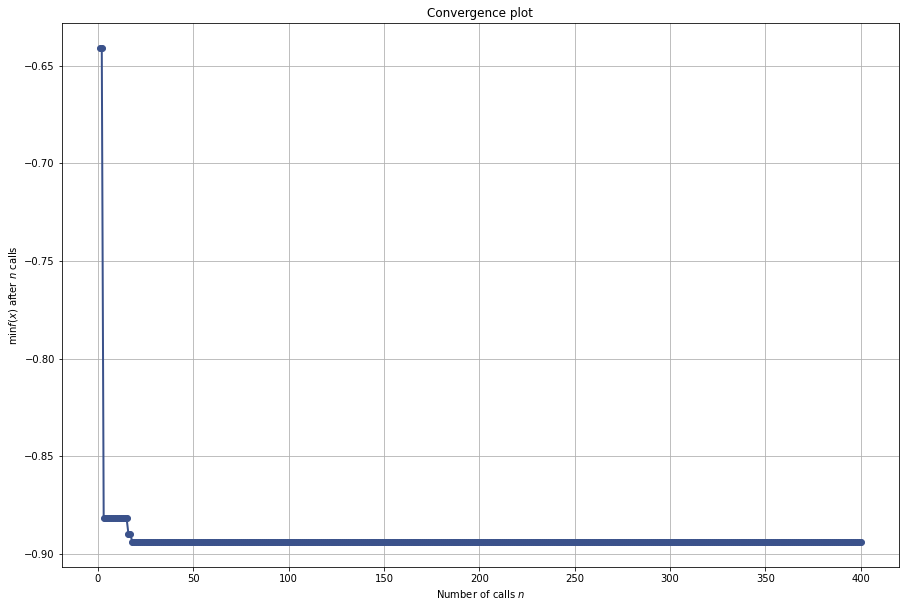

In [86]:
plt.figure(figsize=(15, 10))
vis = plot_convergence(*opt.optimizer_results_)

<Figure size 1440x1080 with 0 Axes>

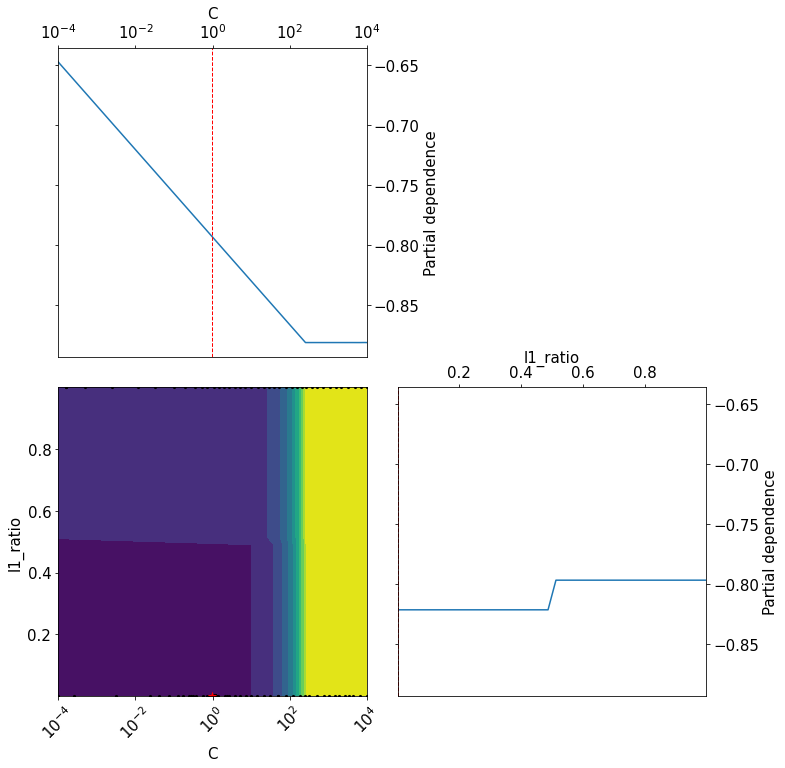

In [87]:
plt.rc('font', size=15)
plt.rc('lines', mew=5)
plt.figure(figsize=(20, 15))
plot_objective(*opt.optimizer_results_, size=5)
plt.savefig(fname='LR_IO_BO.pdf')

In [88]:
model = LogisticRegression(solver='saga', penalty='elasticnet', C=opt.best_params_['C'], l1_ratio=opt.best_params_['l1_ratio'])
print('LR, BO, accuracy on test:')
print(evaluate_accuracy(model, X_train, y_train, X_test, y_test))

LR, BO, accuracy on test:
0.8380952380952381


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [89]:
accs = []
for i in range(5):
    model = LogisticRegression(solver='saga', penalty='elasticnet', C=study.best_trial.params['C'], l1_ratio=study.best_trial.params['l1_ratio'])
    accs.append(evaluate_accuracy(model, X_train, y_train, X_test, y_test))
print('LR, BO, average accuracy on test, 5 fits:')
print(np.mean(accs))

LR, BO, average accuracy on test, 5 fits:
0.8380952380952381


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

